# Los patrones laborales: Análisis de Causalidad en el Rendimiento Diario de los Trabajadores de Fábrica

#### Este proyecto se centra en investigar las relaciones causales entre el rendimiento diario y la attrición de los trabajadores en el contexto de una fábrica. El dataset utilizado contiene 18 meses de datos que incluyen observaciones diarias de eventos regulares (como asistencia de los trabajadores y nivel diario de eficacia) y eventos especiales (como accidentes, terminación de empleados o incorporación de nuevos empleados).


### Hipótesis principal:

La eficacia diaria de los trabajadores en la fábrica se ve influenciada significativamente por factores temporales como:
- El día de la semana
- El día del mes
- La quincena del mes
- El mes


### Otras hipótesis:

1. La edad de los trabajadores afecta a la eficacia diaria de los trabajadores en la fábrica.
2. La diferencia de edad entre un trabajador y su supervisor tiene un impacto en la eficacia diaria promedio del trabajador.
3. Los trabajadores que colaboran principalmente con compañeros del mismo sexo muestran una eficacia diaria promedio diferente en comparación con aquellos que trabajan con compañeros del sexo opuesto.


# Exploración de datos

In [76]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("../Data/raw/EDA.csv", encoding='latin1')

# Mostrar las primeras filas del DataFrame
df.head()

/var/folders/gn/fdryr4k17t95s1_9lf01ghfw0000gn/T/ipykernel_6052/3943079016.py:4: DtypeWarning: Columns (35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("EDA.csv", encoding='latin1')


,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.489,Efficacy,NaN,1.2,NaN,NaN
2,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN
3,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.023,Efficacy,NaN,0.8,NaN,NaN
4,98000003,Elizabeth,Martinez,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN


Este Dataset tiene dos o más columnas por cada trabajaror y día, una es la que evalúa el rendimiento y en otras se muestra la asistencia y el comportamiento, por lo que para este EDA, únicamente se hará uso de las columnas de "Efficacy" para poder esudiar el rendimiento.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411948 entries, 0 to 411947
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   sub_ID                   411948 non-null  int64  
 1   sub_fname                411948 non-null  object 
 2   sub_lname                411948 non-null  object 
 3   sub_age                  411948 non-null  int64  
 4   sub_sex                  411948 non-null  object 
 5   sub_shift                411948 non-null  object 
 6   sub_team                 411948 non-null  object 
 7   sub_role                 411948 non-null  object 
 8   sub_coll_IDs             411136 non-null  object 
 9   sub_colls_same_sex_prtn  410957 non-null  float64
 10  sub_health_h             411948 non-null  float64
 11  sub_commitment_h         411948 non-null  float64
 12  sub_perceptiveness_h     411948 non-null  float64
 13  sub_dexterity_h          411948 non-null  float64
 14  sub_

In [78]:
df.describe()

,sub_ID,sub_age,sub_colls_same_sex_prtn,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,...,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_week_in_series,event_day_in_series,event_weekday_num,actual_efficacy_h,recorded_efficacy
count,4.119480e+05,411948.000000,410957.000000,411948.000000,411948.000000,411948.000000,411948.000000,411948.000000,411948.000000,411948.000000,...,411136.000000,411136.000000,411136.000000,411136.000000,411136.000000,411948.000000,411948.000000,411948.000000,191657.000000,191272.000000
mean,9.800036e+07,41.395637,0.502392,0.747096,0.751878,0.742695,0.741493,0.738500,0.738413,0.735608,...,39.876939,-1.525405,0.750638,0.730454,0.709282,39.509902,274.167562,2.000959,0.669063,0.668879
std,2.076600e+02,13.735554,0.127081,0.154026,0.147780,0.158803,0.149493,0.162415,0.146933,0.164769,...,14.081894,19.397769,0.139544,0.175733,0.161476,22.513467,157.607908,1.415252,0.396246,0.413077
min,9.800000e+07,18.000000,0.000000,0.153000,0.172000,0.169000,0.240000,0.152000,0.290000,0.215000,...,18.000000,-45.000000,0.437000,0.384000,0.346000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,9.800019e+07,29.000000,0.421053,0.655000,0.653000,0.644000,0.646000,0.639000,0.635000,0.623000,...,28.000000,-17.000000,0.629000,0.659000,0.572000,20.000000,138.000000,1.000000,0.410000,0.400000
50%,9.800036e+07,41.000000,0.473684,0.765000,0.764000,0.763000,0.761000,0.755000,0.754000,0.760000,...,38.000000,0.000000,0.747000,0.745000,0.686000,40.000000,274.000000,2.000000,0.615000,0.600000
75%,9.800053e+07,53.000000,0.578947,0.859000,0.867000,0.868000,0.859000,0.864000,0.851000,0.870000,...,53.000000,13.000000,0.868000,0.909000,0.840000,59.000000,411.000000,3.000000,0.874000,0.900000
max,9.800079e+07,65.000000,0.789474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999000,...,62.000000,43.000000,1.000000,0.999000,0.985000,78.000000,546.000000,5.000000,3.763000,4.100000


In [79]:
df.shape

(411948, 42)

# Exploración de la calidad de los datos

In [80]:
# Columnas:

# columns = ['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_colls_same_sex_prtn', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'sup_ID', 'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex', 'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h', 'event_date', 'event_week_in_series', 'event_day_in_series', 'event_weekday_num', 'event_weekday_name', 'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h', 'record_comptype', 'record_cause', 'recorded_efficacy', 'recorded_note_from_sup', 'record_conf_matrix_h']

In [81]:
columns = ['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_colls_same_sex_prtn', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'sup_ID', 'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex', 'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h', 'event_date', 'event_week_in_series', 'event_day_in_series', 'event_weekday_num', 'event_weekday_name', 'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h', 'record_comptype', 'record_cause', 'recorded_efficacy', 'recorded_note_from_sup', 'record_conf_matrix_h']

valores_faltantes = df[columns].isnull().sum() #Exploración de los datos que faltan en el csv

print(valores_faltantes)


sub_ID                          0
sub_fname                       0
sub_lname                       0
sub_age                         0
sub_sex                         0
sub_shift                       0
sub_team                        0
sub_role                        0
sub_coll_IDs                  812
sub_colls_same_sex_prtn       991
sub_health_h                    0
sub_commitment_h                0
sub_perceptiveness_h            0
sub_dexterity_h                 0
sub_sociality_h                 0
sub_goodness_h                  0
sub_strength_h                  0
sub_openmindedness_h            0
sub_workstyle_h                 0
sup_ID                        812
sup_fname                     812
sup_lname                     812
sup_age                       812
sup_sub_age_diff              812
sup_sex                       812
sup_role                      812
sup_commitment_h              812
sup_perceptiveness_h          812
sup_goodness_h                812
event_date    

Existen valores faltantes que están justificados:
- Las variables que comienzan por sup_: Se refiere a los superiores, los datos faltantes se deben a que existe un puesto que no tienen un superior directo, este es el director de produccion.
- Las variables en las que faltan mas la mitad de los datos, se deben al hecho de que por cada día se registan dos filas por empleado que evalúan dos áreas distintas: asistencia y rendimiento; y además, existen otras áreas que se evalúan de manera puntual a nivel de comporamiento como son: aporte de ideas, terminación, incorporación... 
- Las variables en las que no hay datos se debe a la LDPD, puesto que son datos confidencia.
- Los datos faltantes en las variables 'recorded_note_from_sup' y 'record_conf_matrix_h' es porque son anotaciones de caracter opcional.  

In [82]:
df['sub_ID'].value_counts() # Recuento de número de registros por trabajador

sub_ID
98000443    840
98000291    838
98000188    836
98000219    833
98000518    831
           ... 
98000638      6
98000264      5
98000462      3
98000112      3
98000598      3
Name: count, Length: 687, dtype: int64

In [83]:
len(df['sub_ID'].value_counts()) # Recuento de número de trabajadores

687

In [84]:
df['sub_team'].value_counts().sort_index() # Recuento de número de registros en los equipos

sub_team
Team 1        17005
Team 10       17067
Team 11       17024
Team 12       16972
Team 13       17006
Team 14       17006
Team 15       16953
Team 16       17083
Team 17       17053
Team 18       17058
Team 19       17109
Team 2        16979
Team 20       17001
Team 21       17061
Team 22       17039
Team 23       17015
Team 24       17005
Team 3        16998
Team 4        17042
Team 5        17002
Team 6        17061
Team 7        16986
Team 8        17069
Team 9        17059
unassigned     3295
Name: count, dtype: int64

In [85]:
df.groupby('sub_team')['sub_ID'].nunique() # Recuento de trabajadores por equipos

sub_team
Team 1        29
Team 10       27
Team 11       30
Team 12       34
Team 13       25
Team 14       31
Team 15       31
Team 16       26
Team 17       28
Team 18       29
Team 19       28
Team 2        26
Team 20       24
Team 21       32
Team 22       28
Team 23       33
Team 24       27
Team 3        28
Team 4        28
Team 5        27
Team 6        31
Team 7        25
Team 8        31
Team 9        25
unassigned     4
Name: sub_ID, dtype: int64

In [86]:
df['sub_role'].value_counts() # Recuento de número de registros en los roles

sub_role
Laborer                389184
Team Leader             19469
Shift Manager            2483
Production Director       812
Name: count, dtype: int64

In [87]:
df.groupby('sub_sex')['sub_ID'].nunique() # Recuento de trabajadores por genero

sub_sex
F    359
M    328
Name: sub_ID, dtype: int64

In [88]:
df.groupby('sub_shift')['sub_ID'].nunique() # Recuento de trabajadores por turno

sub_shift
Shift 1       226
Shift 2       230
Shift 3       230
unassigned      1
Name: sub_ID, dtype: int64

In [89]:
df.groupby('sub_age')['sub_ID'].nunique() # Recuento de trabajadores por edad

sub_age
18    11
19    13
20    12
21    13
22    15
23    11
24    12
25    16
26    12
27    18
28    17
29    20
30    17
31    18
32    17
33    11
34    23
35     8
36    15
37    12
38    18
39    17
40    14
41    16
42    15
43     9
44    16
45    11
46    17
47    14
48     8
49    11
50    21
51    15
52    12
53    13
54    11
55    16
56    13
57    14
58    15
59    13
60    16
61     9
62    16
63    20
64    12
65    14
Name: sub_ID, dtype: int64

Como solo nos interesan las filas relaccionadas con el rendimiento se hará un filtrado:

In [90]:
df = df[(df['record_comptype'].str.contains('Efficacy') | df['record_cause'].str.contains('Efficacy'))]
df.head()

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.489,Efficacy,NaN,1.2,NaN,NaN
3,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.023,Efficacy,NaN,0.8,NaN,NaN
5,98000003,Elizabeth,Martinez,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,0.997,Efficacy,NaN,0.9,NaN,NaN
8,98000004,Alice,Zimmerman,18,F,Shift 1,Team 4,Team Leader,"[98000001, 98000002, 98000003, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,0.883,Efficacy,NaN,0.9,NaN,NaN
10,98000005,Karen,Bauer,59,F,Shift 1,Team 5,Team Leader,"[98000001, 98000002, 98000003, 98000004, 98000...",0.714286,...,4,Friday,Efficacy,NaN,0.108,Efficacy,NaN,0.1,NaN,NaN


Debido a que el Production Director no tiene datos de rendimiento registrados, se filtrará también:

In [91]:
df = df[df['sub_role'] != 'Production Director']
df.head()

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.489,Efficacy,NaN,1.2,NaN,NaN
3,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.023,Efficacy,NaN,0.8,NaN,NaN
5,98000003,Elizabeth,Martinez,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,0.997,Efficacy,NaN,0.9,NaN,NaN
8,98000004,Alice,Zimmerman,18,F,Shift 1,Team 4,Team Leader,"[98000001, 98000002, 98000003, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,0.883,Efficacy,NaN,0.9,NaN,NaN
10,98000005,Karen,Bauer,59,F,Shift 1,Team 5,Team Leader,"[98000001, 98000002, 98000003, 98000004, 98000...",0.714286,...,4,Friday,Efficacy,NaN,0.108,Efficacy,NaN,0.1,NaN,NaN


In [92]:
df[columns].isnull().sum()

sub_ID                          0
sub_fname                       0
sub_lname                       0
sub_age                         0
sub_sex                         0
sub_shift                       0
sub_team                        0
sub_role                        0
sub_coll_IDs                    0
sub_colls_same_sex_prtn         0
sub_health_h                    0
sub_commitment_h                0
sub_perceptiveness_h            0
sub_dexterity_h                 0
sub_sociality_h                 0
sub_goodness_h                  0
sub_strength_h                  0
sub_openmindedness_h            0
sub_workstyle_h                 0
sup_ID                          0
sup_fname                       0
sup_lname                       0
sup_age                         0
sup_sub_age_diff                0
sup_sex                         0
sup_role                        0
sup_commitment_h                0
sup_perceptiveness_h            0
sup_goodness_h                  0
event_date    

Se elimina las filas que no se van a utilizar:

In [93]:
columnas_innecesarias = ['sub_fname', 'sub_lname', 'sup_fname', 'sup_lname', 'behav_cause_h',  'record_cause', 'recorded_note_from_sup', 'record_conf_matrix_h']  # Lista de columnas que no son de interés

df = df.drop(columnas_innecesarias, axis=1)

df.head()

,sub_ID,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,sub_health_h,sub_commitment_h,...,sup_goodness_h,event_date,event_week_in_series,event_day_in_series,event_weekday_num,event_weekday_name,behav_comptype_h,actual_efficacy_h,record_comptype,recorded_efficacy
1,98000001,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,0.895,1.000,...,0.971,1/1/2021,1,1,4,Friday,Efficacy,1.489,Efficacy,1.2
3,98000002,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714286,0.752,0.563,...,0.971,1/1/2021,1,1,4,Friday,Efficacy,1.023,Efficacy,0.8
5,98000003,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714286,0.573,0.907,...,0.971,1/1/2021,1,1,4,Friday,Efficacy,0.997,Efficacy,0.9
8,98000004,18,F,Shift 1,Team 4,Team Leader,"[98000001, 98000002, 98000003, 98000005, 98000...",0.714286,0.547,0.819,...,0.971,1/1/2021,1,1,4,Friday,Efficacy,0.883,Efficacy,0.9
10,98000005,59,F,Shift 1,Team 5,Team Leader,"[98000001, 98000002, 98000003, 98000004, 98000...",0.714286,0.777,0.629,...,0.971,1/1/2021,1,1,4,Friday,Efficacy,0.108,Efficacy,0.1


# Visualizaciones de los datos

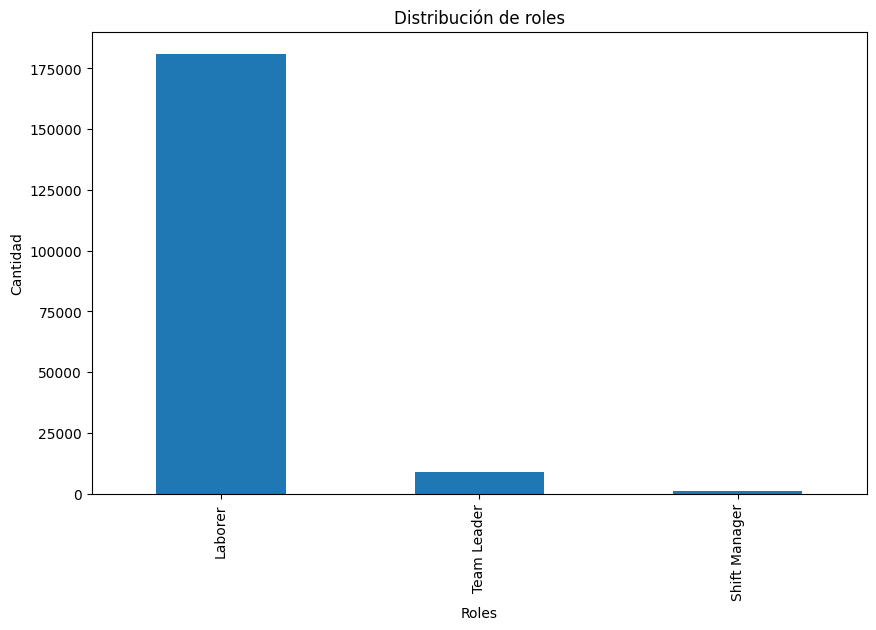

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Tamaño de la figura
df['sub_role'].value_counts().plot(kind='bar')  # Diagrama de barras de la columna 'sub_role'
plt.title('Distribución de roles')  # Título del gráfico
plt.xlabel('Roles')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

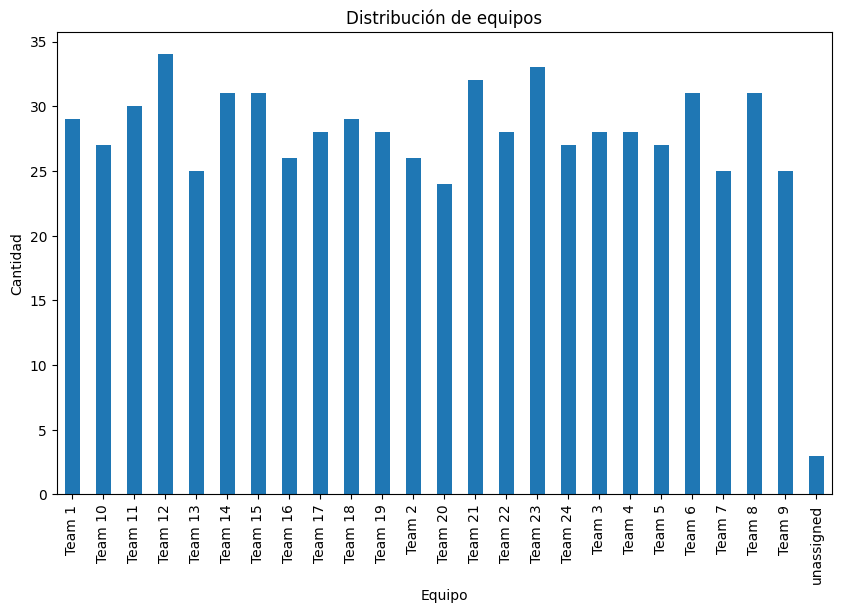

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Tamaño de la figura
df.groupby('sub_team')['sub_ID'].nunique().plot(kind='bar')  # Diagrama de barras de la columna 'sub_role'
plt.title('Distribución de equipos')  # Título del gráfico
plt.xlabel('Equipo')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

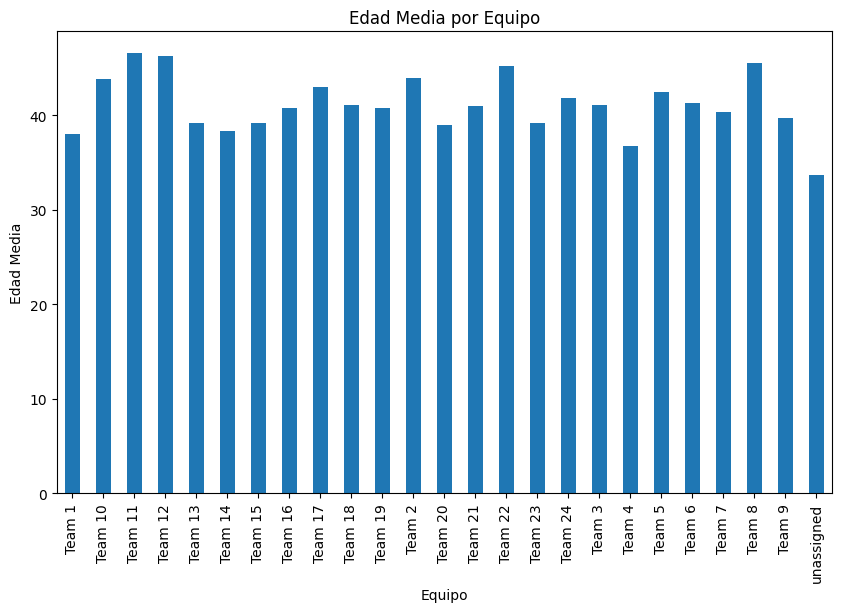

In [96]:
import matplotlib.pyplot as plt

# Calcular la edad media por equipo
age_mean_by_team = df.groupby('sub_team')['sub_age'].mean()

plt.figure(figsize=(10, 6))  # Tamaño de la figura
age_mean_by_team.plot(kind='bar')  # Diagrama de barras de la edad media por equipo
plt.title('Edad Media por Equipo')  # Título del gráfico
plt.xlabel('Equipo')  # Etiqueta del eje x
plt.ylabel('Edad Media')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico


# Estudio de correlación

In [97]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Filtrar columnas numéricas
numeric_df.corr()



,sub_ID,sub_age,sub_colls_same_sex_prtn,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,...,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_week_in_series,event_day_in_series,event_weekday_num,actual_efficacy_h,recorded_efficacy
sub_ID,1.000000,0.047025,-0.009010,0.013930,-0.010982,0.007666,0.031036,-0.067357,0.015942,0.048304,...,0.079967,0.024725,-0.081458,0.139378,-0.154154,0.138465,0.138488,-0.000421,0.012130,0.011866
sub_age,0.047025,1.000000,0.033147,0.076925,0.030415,-0.005078,-0.008772,0.010000,-0.013384,-0.002927,...,0.029923,-0.687661,0.004241,-0.043997,-0.014482,-0.011879,-0.011882,0.000344,0.123642,0.119838
sub_colls_same_sex_prtn,-0.009010,0.033147,1.000000,0.055797,-0.019137,-0.030582,-0.009409,-0.079567,0.008157,0.008395,...,0.030970,-0.001019,0.041530,-0.018620,0.136328,-0.002075,-0.002079,0.000475,0.062842,0.060756
sub_health_h,0.013930,0.076925,0.055797,1.000000,-0.028832,0.026292,0.029727,-0.033722,-0.052739,0.038472,...,-0.042826,-0.085677,0.032815,0.085903,0.035312,-0.001244,-0.001238,-0.000287,0.007682,0.006775
sub_commitment_h,-0.010982,0.030415,-0.019137,-0.028832,1.000000,0.005929,-0.011037,-0.001791,-0.037150,0.026136,...,-0.033194,-0.045687,0.011094,-0.030856,0.028965,0.011811,0.011813,-0.000795,0.033074,0.032473
sub_perceptiveness_h,0.007666,-0.005078,-0.030582,0.026292,0.005929,1.000000,0.001946,-0.000021,-0.032928,-0.014817,...,-0.019447,-0.010523,0.054310,-0.048834,0.044035,0.013787,0.013787,0.000355,-0.031031,-0.029886
sub_dexterity_h,0.031036,-0.008772,-0.009409,0.029727,-0.011037,0.001946,1.000000,-0.029482,-0.031005,0.063872,...,-0.016985,-0.006114,0.030780,0.037445,0.033119,0.031558,0.031558,0.001044,0.002619,0.002600
sub_sociality_h,-0.067357,0.010000,-0.079567,-0.033722,-0.001791,-0.000021,-0.029482,1.000000,-0.003389,0.038387,...,0.012376,0.001895,-0.003156,0.029476,0.032209,0.003960,0.003961,-0.000098,-0.018933,-0.018615
sub_goodness_h,0.015942,-0.013384,0.008157,-0.052739,-0.037150,-0.032928,-0.031005,-0.003389,1.000000,0.014521,...,-0.022586,-0.006911,0.014731,-0.021669,-0.002944,0.005934,0.005930,-0.000442,0.033774,0.032966
sub_strength_h,0.048304,-0.002927,0.008395,0.038472,0.026136,-0.014817,0.063872,0.038387,0.014521,1.000000,...,-0.031445,-0.020763,0.009698,0.022271,-0.018059,0.013200,0.013202,0.000046,-0.037399,-0.037064


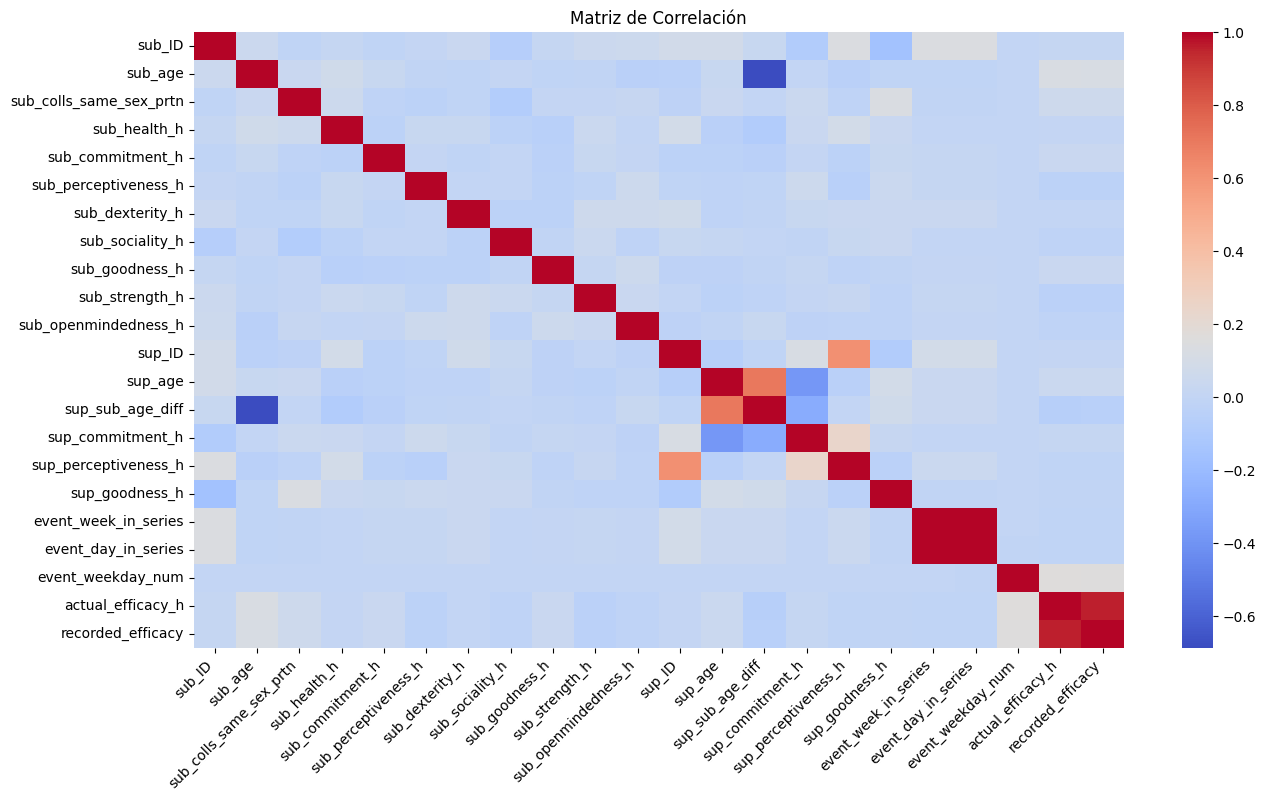

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crea una figura y un eje para el gráfico
plt.figure(figsize=(15, 8))
ax = plt.axes()

# Crea el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, cmap='coolwarm', ax=ax)

# Ajusta la posición de las etiquetas de los ejes
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Establece el título del gráfico
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()


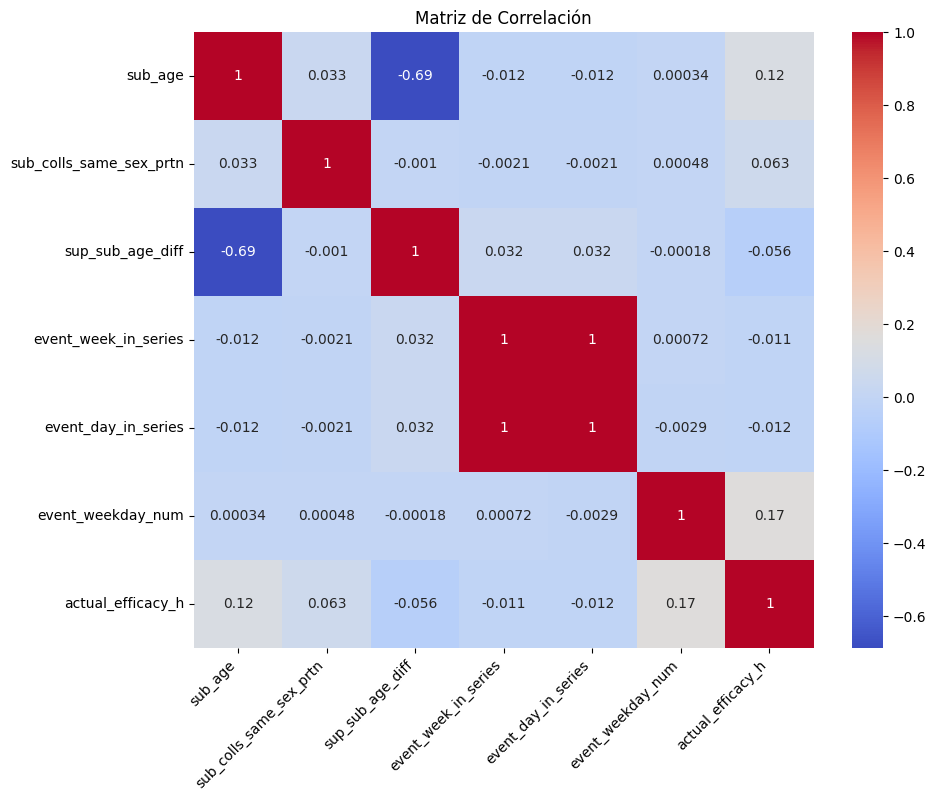

In [99]:
correlation_matrix1 = df[['sub_age', 'sub_colls_same_sex_prtn', 'sup_sub_age_diff', 'event_week_in_series', 'event_day_in_series', 'event_weekday_num', 'actual_efficacy_h']].corr()

# Crea una figura y un eje para el gráfico
plt.figure(figsize=(10, 8))
ax = plt.axes()

# Crea el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', ax=ax)

# Ajusta la posición de las etiquetas de los ejes
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Establece el título del gráfico
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()

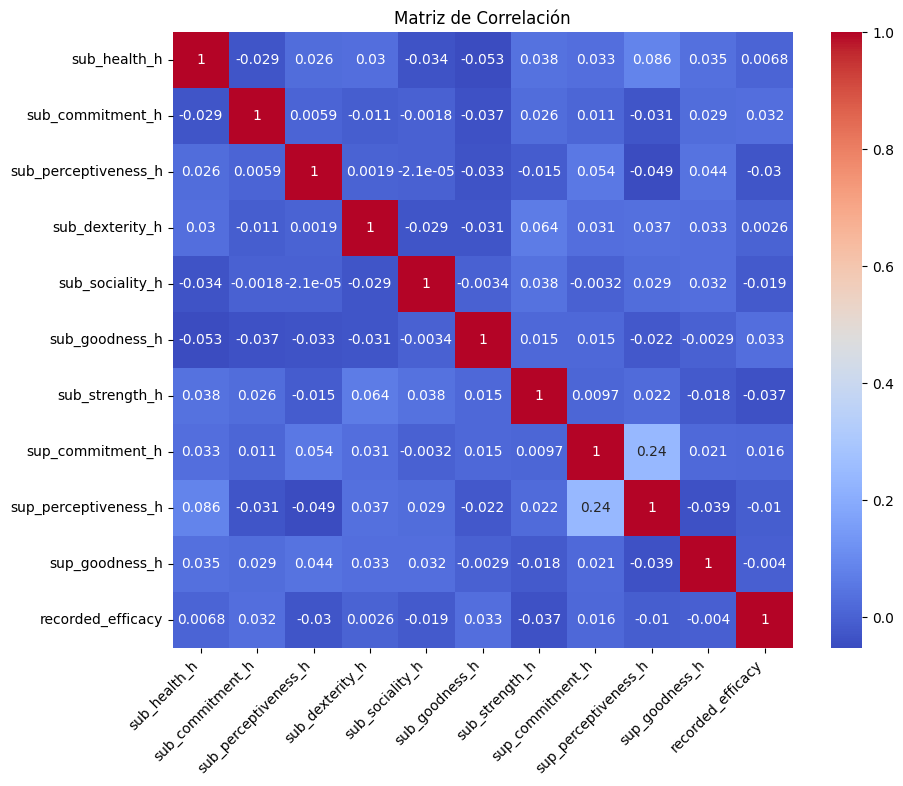

In [100]:
correlation_matrix2 = df[['sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h', 'recorded_efficacy']].corr()

# Crea una figura y un eje para el gráfico
plt.figure(figsize=(10, 8))
ax = plt.axes()

# Crea el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', ax=ax)

# Ajusta la posición de las etiquetas de los ejes
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Establece el título del gráfico
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()


# Creación de columnas

Se crearán las siguientes columnas:

- Día del mes (1-31)
- Quincena del mes
- Mes

In [101]:
# Convertir la columna 'event_date' al formato de fecha
df['event_date'] = pd.to_datetime(df['event_date'])

# Extraer el número del día del mes y crear una nueva columna 'dia_del_mes'
df['dia_del_mes'] = df['event_date'].dt.day



In [102]:
import numpy as np

# Crear una nueva columna 'quincena_del_mes' basada en la columna 'dia_del_mes'
df['quincena_del_mes'] = np.where(df['dia_del_mes'] <= 15, 1, 2)



In [103]:
# Convertir la columna 'event_date' a tipo datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# Crear una nueva columna 'mes' basada en la columna 'event_date'
df['mes'] = df['event_date'].dt.month


In [104]:
df

,sub_ID,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,sub_health_h,sub_commitment_h,...,event_day_in_series,event_weekday_num,event_weekday_name,behav_comptype_h,actual_efficacy_h,record_comptype,recorded_efficacy,dia_del_mes,quincena_del_mes,mes
1,98000001,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,0.895,1.000,...,1,4,Friday,Efficacy,1.489,Efficacy,1.2,1,1,1
3,98000002,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714286,0.752,0.563,...,1,4,Friday,Efficacy,1.023,Efficacy,0.8,1,1,1
5,98000003,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714286,0.573,0.907,...,1,4,Friday,Efficacy,0.997,Efficacy,0.9,1,1,1
8,98000004,18,F,Shift 1,Team 4,Team Leader,"[98000001, 98000002, 98000003, 98000005, 98000...",0.714286,0.547,0.819,...,1,4,Friday,Efficacy,0.883,Efficacy,0.9,1,1,1
10,98000005,59,F,Shift 1,Team 5,Team Leader,"[98000001, 98000002, 98000003, 98000004, 98000...",0.714286,0.777,0.629,...,1,4,Friday,Efficacy,0.108,Efficacy,0.1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411936,98000785,57,F,Shift 2,Team 12,Laborer,"[98000247, 98000249, 98000251, 98000255, 98000...",0.631579,0.713,0.705,...,546,3,Thursday,Efficacy,0.620,Efficacy,0.7,30,2,6
411938,98000786,30,M,Shift 1,Team 8,Laborer,"[98000166, 98000168, 98000170, 98000171, 98000...",0.631579,0.905,0.704,...,546,3,Thursday,Efficacy,0.931,Efficacy,0.8,30,2,6
411942,98000787,28,F,Shift 3,Team 21,Laborer,"[98000428, 98000429, 98000430, 98000431, 98000...",0.526316,0.749,0.801,...,546,3,Thursday,Efficacy,1.244,Efficacy,1.5,30,2,6
411945,98000788,47,F,Shift 1,Team 6,Laborer,"[98000125, 98000127, 98000130, 98000131, 98000...",0.526316,0.436,0.926,...,546,3,Thursday,Efficacy,0.261,Efficacy,0.3,30,2,6


# Estudio de hipótesis

Comprobación de la normalidad de la distribución "actual_efficacy_h"

In [105]:
from scipy.stats import shapiro

# Obtener los datos de eficacia diaria
df_filtered = df[['actual_efficacy_h']].dropna()
datos = df_filtered['actual_efficacy_h']

# Realizar el test de normalidad de Shapiro-Wilk
statistic, p_value = shapiro(datos)

# Resultados
print("Estadístico de Shapiro:", statistic)
print("Valor p:", p_value)


Estadístico de Shapiro: 0.9505245089530945
Valor p: 0.0


/Users/usuario/miniconda3/envs/ramp_up_py395/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Hipótesis Principal

#### La eficacia diaria de los trabajadores en la fábrica se ve influenciada significativamente por factores como el día de la semana

$$ H_0: \mu_{0}=\mu_{1}=\ldots=\mu_{n}$$
$$ H_1: \mu_{i}\neq\mu_{j} 

In [106]:
eficacia_por_dia = df.groupby('event_weekday_name')['actual_efficacy_h'].mean()
print(eficacia_por_dia)

event_weekday_name
Friday       0.762601
Monday       0.575183
Saturday     0.803288
Thursday     0.716601
Tuesday      0.622972
Wednesday    0.668088
Name: actual_efficacy_h, dtype: float64


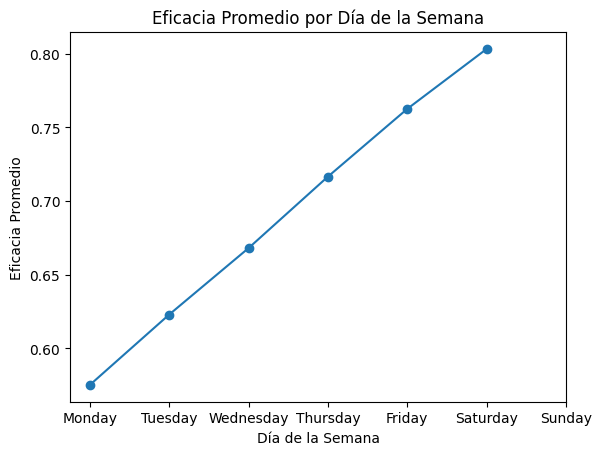

In [107]:
import matplotlib.pyplot as plt

# Agrupar por día de la semana y calcular la eficacia promedio
efficiency_by_weekday = df.groupby('event_weekday_name')['actual_efficacy_h'].mean()

# Reordenar el índice
efficiency_by_weekday = efficiency_by_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


efficiency_by_weekday.plot(marker='o')
plt.title('Eficacia Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Eficacia Promedio')
plt.xticks(range(len(efficiency_by_weekday)), efficiency_by_weekday.index)
plt.show()


In [108]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Filtrar los datos relevantes
df_filtered = df[['event_weekday_name', 'actual_efficacy_h']].dropna()

# Realizar el análisis de varianza
f_statistic, p_value = f_oneway(*[group['actual_efficacy_h'] for name, group in df_filtered.groupby('event_weekday_name')])

# Resultados
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

Estadístico F: 1099.729174836343
Valor p: 0.0


In [109]:
if p_value < 0.05:
    print("Rechazar la hipótesis nula.")
else:
    print("Aceptar la hipótesis nula.")

Rechazar la hipótesis nula.


In [110]:
# Realizar pruebas de comparaciones múltiples (por ejemplo, prueba de Tukey)
tukey_results = pairwise_tukeyhsd(df_filtered['actual_efficacy_h'], df_filtered['event_weekday_name'])
print(tukey_results)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
  Friday    Monday  -0.1874    0.0 -0.1955 -0.1794   True
  Friday  Saturday   0.0407 0.9678 -0.1045  0.1859  False
  Friday  Thursday   -0.046    0.0 -0.0541 -0.0379   True
  Friday   Tuesday  -0.1396    0.0 -0.1477 -0.1316   True
  Friday Wednesday  -0.0945    0.0 -0.1026 -0.0865   True
  Monday  Saturday   0.2281 0.0001  0.0829  0.3733   True
  Monday  Thursday   0.1414    0.0  0.1334  0.1495   True
  Monday   Tuesday   0.0478    0.0  0.0397  0.0558   True
  Monday Wednesday   0.0929    0.0  0.0849   0.101   True
Saturday  Thursday  -0.0867 0.5306 -0.2319  0.0585  False
Saturday   Tuesday  -0.1803 0.0054 -0.3255 -0.0351   True
Saturday Wednesday  -0.1352 0.0847 -0.2804    0.01  False
Thursday   Tuesday  -0.0936    0.0 -0.1017 -0.0856   True
Thursday Wednesday  -0.0485    0.0 -0.0566 -0.0405   True
 Tuesday Wedne

In [111]:
# Identificar las comparaciones significativamente diferentes
comparaciones_significativas = tukey_results.reject
comparaciones_grupo = tukey_results.groupsunique

for i in range(len(comparaciones_grupo)):
    for j in range(i + 1, len(comparaciones_grupo)):
        group1 = comparaciones_grupo[i]
        group2 = comparaciones_grupo[j]
        es_significativa = comparaciones_significativas[i]
        
        if es_significativa:
            print(f"'{group1}' VS '{group2}'.")


'Friday' VS 'Monday'.
'Friday' VS 'Saturday'.
'Friday' VS 'Thursday'.
'Friday' VS 'Tuesday'.
'Friday' VS 'Wednesday'.
'Saturday' VS 'Thursday'.
'Saturday' VS 'Tuesday'.
'Saturday' VS 'Wednesday'.
'Thursday' VS 'Tuesday'.
'Thursday' VS 'Wednesday'.
'Tuesday' VS 'Wednesday'.


#### La eficacia diaria de los trabajadores en la fábrica se ve influenciada significativamente por día del mes.

$$ H_0: \mu_{0}=\mu_{1}=\ldots=\mu_{n}$$
$$ H_1: \mu_{i}\neq\mu_{j} 

In [112]:
eficacia_por_dia_del_mes = df.groupby('dia_del_mes')['actual_efficacy_h'].mean()
print(eficacia_por_dia_del_mes)

dia_del_mes
1     0.646666
2     0.628912
3     0.650881
4     0.641687
5     0.646070
6     0.615999
7     0.635743
8     0.632984
9     0.625990
10    0.649512
11    0.644454
12    0.648980
13    0.619894
14    0.630766
15    0.634932
16    0.623621
17    0.650149
18    0.645677
19    0.639588
20    0.639540
21    0.655758
22    0.686377
23    0.683672
24    0.707198
25    0.728350
26    0.749142
27    0.741008
28    0.751388
29    0.794272
30    0.783777
31    0.798398
Name: actual_efficacy_h, dtype: float64


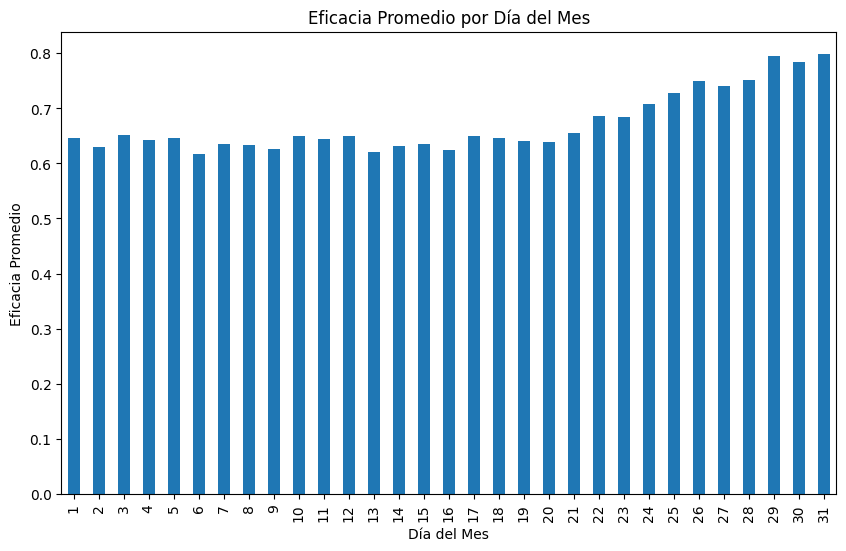

In [113]:
import matplotlib.pyplot as plt

# Agrupar por día del mes y calcular la eficacia promedio
efficiency_by_day = df.groupby('dia_del_mes')['actual_efficacy_h'].mean()

plt.figure(figsize=(10, 6))
efficiency_by_day.plot(kind='bar')
plt.title('Eficacia Promedio por Día del Mes')
plt.xlabel('Día del Mes')
plt.ylabel('Eficacia Promedio')
plt.show()


In [114]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Filtrar los datos relevantes
df_filtered = df[['dia_del_mes', 'actual_efficacy_h']].dropna()

# Realizar el análisis de varianza
f_statistic, p_value = f_oneway(*[group['actual_efficacy_h'] for name, group in df_filtered.groupby('dia_del_mes')])

# Resultados
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

Estadístico F: 109.04829574330094
Valor p: 0.0


In [115]:
if p_value < 0.05:
    print("Rechazar la hipótesis nula.")
else:
    print("Aceptar la hipótesis nula.")

Rechazar la hipótesis nula.


In [116]:
# Realizar pruebas de comparaciones múltiples (por ejemplo, prueba de Tukey)
tukey_results = pairwise_tukeyhsd(df_filtered['actual_efficacy_h'], df_filtered['dia_del_mes'])
print(tukey_results)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0178 0.7272 -0.0435   0.008  False
     1      3   0.0042    1.0 -0.0215    0.03  False
     1      4   -0.005    1.0 -0.0308  0.0208  False
     1      5  -0.0006    1.0 -0.0269  0.0257  False
     1      6  -0.0307 0.0044  -0.057 -0.0044   True
     1      7  -0.0109 0.9995 -0.0367  0.0148  False
     1      8  -0.0137 0.9764 -0.0389  0.0116  False
     1      9  -0.0207 0.3797 -0.0464  0.0051  False
     1     10   0.0028    1.0 -0.0229  0.0286  False
     1     11  -0.0022    1.0  -0.028  0.0235  False
     1     12   0.0023    1.0  -0.024  0.0286  False
     1     13  -0.0268 0.0388  -0.053 -0.0005   True
     1     14  -0.0159 0.8933 -0.0416  0.0098  False
     1     15  -0.0117 0.9976  -0.037  0.0135  False
     1     16   -0.023 0.1678 -0.0488  0.0027  False
     1     17   0.0035    1.0 -0.0223  0.0292 

In [117]:
# Identificar las comparaciones significativamente diferentes
comparaciones_significativas = tukey_results.reject
comparaciones_grupo = tukey_results.groupsunique

for i in range(len(comparaciones_grupo)):
    for j in range(i + 1, len(comparaciones_grupo)):
        group1 = comparaciones_grupo[i]
        group2 = comparaciones_grupo[j]
        es_significativa = comparaciones_significativas[i]
        
        if es_significativa:
            print(f"'{group1}' VS '{group2}'.")

'5' VS '6'.
'5' VS '7'.
'5' VS '8'.
'5' VS '9'.
'5' VS '10'.
'5' VS '11'.
'5' VS '12'.
'5' VS '13'.
'5' VS '14'.
'5' VS '15'.
'5' VS '16'.
'5' VS '17'.
'5' VS '18'.
'5' VS '19'.
'5' VS '20'.
'5' VS '21'.
'5' VS '22'.
'5' VS '23'.
'5' VS '24'.
'5' VS '25'.
'5' VS '26'.
'5' VS '27'.
'5' VS '28'.
'5' VS '29'.
'5' VS '30'.
'5' VS '31'.
'12' VS '13'.
'12' VS '14'.
'12' VS '15'.
'12' VS '16'.
'12' VS '17'.
'12' VS '18'.
'12' VS '19'.
'12' VS '20'.
'12' VS '21'.
'12' VS '22'.
'12' VS '23'.
'12' VS '24'.
'12' VS '25'.
'12' VS '26'.
'12' VS '27'.
'12' VS '28'.
'12' VS '29'.
'12' VS '30'.
'12' VS '31'.
'21' VS '22'.
'21' VS '23'.
'21' VS '24'.
'21' VS '25'.
'21' VS '26'.
'21' VS '27'.
'21' VS '28'.
'21' VS '29'.
'21' VS '30'.
'21' VS '31'.
'22' VS '23'.
'22' VS '24'.
'22' VS '25'.
'22' VS '26'.
'22' VS '27'.
'22' VS '28'.
'22' VS '29'.
'22' VS '30'.
'22' VS '31'.
'23' VS '24'.
'23' VS '25'.
'23' VS '26'.
'23' VS '27'.
'23' VS '28'.
'23' VS '29'.
'23' VS '30'.
'23' VS '31'.
'24' VS '25'.
'24' VS 

#### La eficacia diaria de los trabajadores en la fábrica se ve influenciada significativamente por factores como la quincena del mes.

$$ H_0: \mu_{0}=\mu_{1}$$
$$ H_1: \mu_{i}\neq\mu_{j} 

In [118]:
eficacia_por_quincena_del_mes = df.groupby('quincena_del_mes')['actual_efficacy_h'].mean()
print(eficacia_por_quincena_del_mes)

quincena_del_mes
1    0.636997
2    0.700907
Name: actual_efficacy_h, dtype: float64


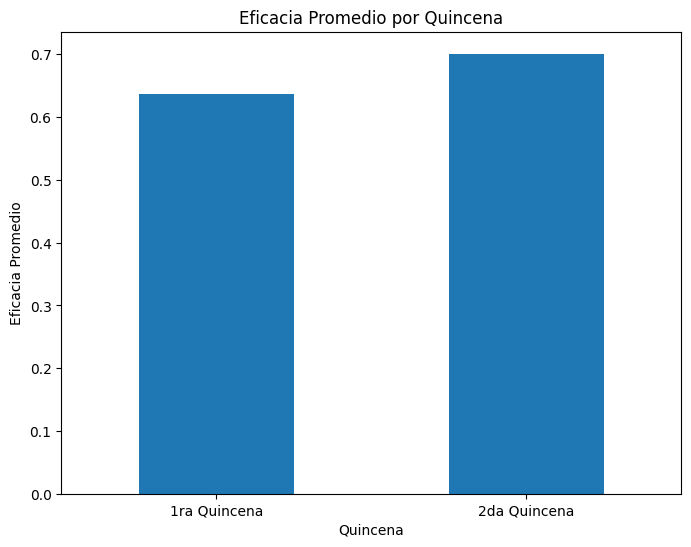

In [119]:
import matplotlib.pyplot as plt

# Agrupar por quincena y calcular la eficiencia promedio
efficiency_by_quincena = df.groupby('quincena_del_mes')['actual_efficacy_h'].mean()

plt.figure(figsize=(8, 6))
efficiency_by_quincena.plot(kind='bar', rot=0)
plt.title('Eficacia Promedio por Quincena')
plt.xlabel('Quincena')
plt.ylabel('Eficacia Promedio')
plt.xticks(range(len(efficiency_by_quincena)), ['1ra Quincena', '2da Quincena'])
plt.show()


In [120]:
from scipy.stats import mannwhitneyu

# Filtrar los datos relevantes para cada quincena (1 o 2)
df_quincena_1 = df[df['quincena_del_mes'] == 1]['actual_efficacy_h'].dropna()
df_quincena_2 = df[df['quincena_del_mes'] == 2]['actual_efficacy_h'].dropna()

# Realizar la prueba de Mann-Whitney U para muestras independientes
statistic, p_value = mannwhitneyu(df_quincena_1, df_quincena_2, alternative='two-sided')

# Mostrar los resultados
print("Estadístico U:", statistic)
print("Valor p:", p_value)


Estadístico U: 4161846435.5
Valor p: 3.3368844324544502e-254


In [121]:
if p_value < 0.05:
    print("Rechazar la hipótesis nula.")
else:
    print("Aceptar la hipótesis nula.")

Rechazar la hipótesis nula.


#### La eficacia diaria de los trabajadores en la fábrica se ve influenciada significativamente por el mes.

$$ H_0: \mu_{0}=\mu_{1}=\ldots=\mu_{n}$$
$$ H_1: \mu_{i}\neq\mu_{j} 

In [122]:
eficacia_por_mes = df.groupby('mes')['actual_efficacy_h'].mean()
print(eficacia_por_mes)

mes
1     0.737469
2     0.697251
3     0.680332
4     0.666280
5     0.618232
6     0.602344
7     0.609516
8     0.629943
9     0.664569
10    0.689098
11    0.697856
12    0.754539
Name: actual_efficacy_h, dtype: float64


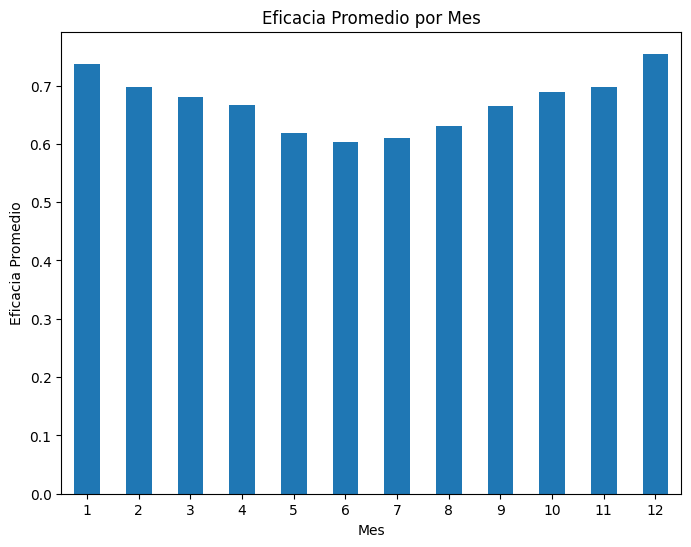

In [123]:
import matplotlib.pyplot as plt

# Agrupar por mes y calcular la eficiencia promedio
efficiency_by_month = df.groupby('mes')['actual_efficacy_h'].mean()

plt.figure(figsize=(8, 6))
efficiency_by_month.plot(kind='bar', rot=0)
plt.title('Eficacia Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Eficacia Promedio')
plt.xticks(range(len(efficiency_by_month)), efficiency_by_month.index)
plt.show()

In [124]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Filtrar los datos relevantes
df_filtered = df[['mes', 'actual_efficacy_h']].dropna()

# Realizar el análisis de varianza
f_statistic, p_value = f_oneway(*[group['actual_efficacy_h'] for name, group in df_filtered.groupby('mes')])

# Resultados
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)



Estadístico F: 243.8607340880345
Valor p: 0.0


In [125]:
if p_value < 0.05:
    print("Rechazar la hipótesis nula.")
else:
    print("Aceptar la hipótesis nula.")

Rechazar la hipótesis nula.


In [126]:
# Realizar pruebas de comparaciones múltiples (por ejemplo, prueba de Tukey)
tukey_results = pairwise_tukeyhsd(df_filtered['actual_efficacy_h'], df_filtered['mes'])
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0402    0.0 -0.0531 -0.0274   True
     1      3  -0.0571    0.0 -0.0695 -0.0447   True
     1      4  -0.0712    0.0 -0.0838 -0.0586   True
     1      5  -0.1192    0.0 -0.1318 -0.1066   True
     1      6  -0.1351    0.0 -0.1477 -0.1226   True
     1      7   -0.128    0.0 -0.1432 -0.1127   True
     1      8  -0.1075    0.0 -0.1228 -0.0922   True
     1      9  -0.0729    0.0 -0.0882 -0.0576   True
     1     10  -0.0484    0.0 -0.0639 -0.0328   True
     1     11  -0.0396    0.0 -0.0549 -0.0243   True
     1     12   0.0171 0.0117   0.002  0.0322   True
     2      3  -0.0169 0.0007 -0.0295 -0.0044   True
     2      4   -0.031    0.0 -0.0437 -0.0182   True
     2      5   -0.079    0.0 -0.0918 -0.0663   True
     2      6  -0.0949    0.0 -0.1076 -0.0822   True
     2      7  -0.0877    0.0 -0.1032 -0.0723 

In [127]:
# Identificar las comparaciones significativamente diferentes
comparaciones_significativas = tukey_results.reject
comparaciones_grupo = tukey_results.groupsunique

for i in range(len(comparaciones_grupo)):
    for j in range(i + 1, len(comparaciones_grupo)):
        group1 = comparaciones_grupo[i]
        group2 = comparaciones_grupo[j]
        es_significativa = comparaciones_significativas[i]
        
        if es_significativa:
            print(f"'{group1}' VS '{group2}'.")

'1' VS '2'.
'1' VS '3'.
'1' VS '4'.
'1' VS '5'.
'1' VS '6'.
'1' VS '7'.
'1' VS '8'.
'1' VS '9'.
'1' VS '10'.
'1' VS '11'.
'1' VS '12'.
'2' VS '3'.
'2' VS '4'.
'2' VS '5'.
'2' VS '6'.
'2' VS '7'.
'2' VS '8'.
'2' VS '9'.
'2' VS '10'.
'2' VS '11'.
'2' VS '12'.
'3' VS '4'.
'3' VS '5'.
'3' VS '6'.
'3' VS '7'.
'3' VS '8'.
'3' VS '9'.
'3' VS '10'.
'3' VS '11'.
'3' VS '12'.
'4' VS '5'.
'4' VS '6'.
'4' VS '7'.
'4' VS '8'.
'4' VS '9'.
'4' VS '10'.
'4' VS '11'.
'4' VS '12'.
'5' VS '6'.
'5' VS '7'.
'5' VS '8'.
'5' VS '9'.
'5' VS '10'.
'5' VS '11'.
'5' VS '12'.
'6' VS '7'.
'6' VS '8'.
'6' VS '9'.
'6' VS '10'.
'6' VS '11'.
'6' VS '12'.
'7' VS '8'.
'7' VS '9'.
'7' VS '10'.
'7' VS '11'.
'7' VS '12'.
'8' VS '9'.
'8' VS '10'.
'8' VS '11'.
'8' VS '12'.
'9' VS '10'.
'9' VS '11'.
'9' VS '12'.
'10' VS '11'.
'10' VS '12'.
'11' VS '12'.


### Hipótesis Secundarias

La eficacia diaria de los trabajadores en la fábrica se ve influenciada significativamente por factores como la edad de los trabajadores.

$$ H_0: \mu_{0}=\mu_{1}=\ldots=\mu_{n}$$
$$ H_1: \mu_{i}\neq\mu_{j} 

In [128]:
[df[df['sub_age'] <= 30]['actual_efficacy_h'].mean(),
df[(df['sub_age'] > 30) & (df['sub_age'] <= 40)]['actual_efficacy_h'].mean(),
df[(df['sub_age'] > 40) & (df['sub_age'] <= 50)]['actual_efficacy_h'].mean(),
df[df['sub_age'] > 50]['actual_efficacy_h'].mean()]

[0.5799868341174685, 0.66224319264806, 0.7427590876139188, 0.7053964866335622]

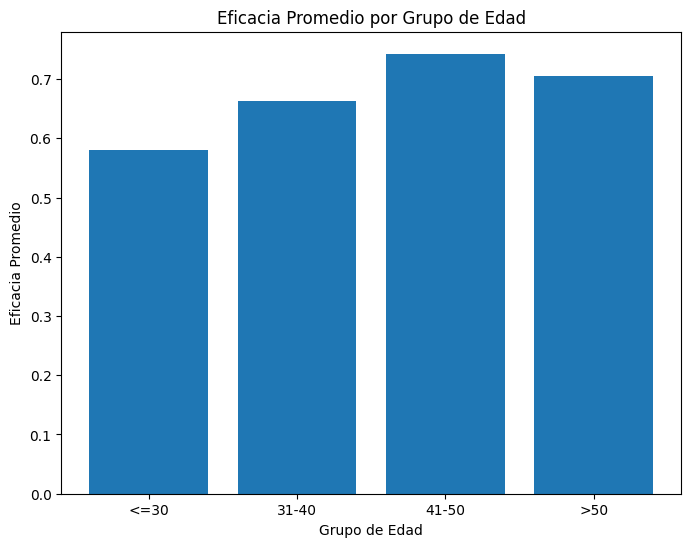

In [129]:
import matplotlib.pyplot as plt

# Dividir los datos en grupos por edad
age_groups = [df[df['sub_age'] <= 30]['actual_efficacy_h'].mean(),
              df[(df['sub_age'] > 30) & (df['sub_age'] <= 40)]['actual_efficacy_h'].mean(),
              df[(df['sub_age'] > 40) & (df['sub_age'] <= 50)]['actual_efficacy_h'].mean(),
              df[df['sub_age'] > 50]['actual_efficacy_h'].mean()]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el gráfico de barras
age_labels = ['<=30', '31-40', '41-50', '>50']
ax.bar(age_labels, age_groups)
ax.set_title('Eficacia Promedio por Grupo de Edad')
ax.set_xlabel('Grupo de Edad')
ax.set_ylabel('Eficacia Promedio')

# Mostrar el gráfico
plt.show()

In [130]:
from scipy.stats import f_oneway

df_filtered = df[['sub_age', 'actual_efficacy_h']].dropna()

# Dividir los datos en grupos por edad
age_groups = [df_filtered[df_filtered['sub_age'] <= 30]['actual_efficacy_h'],
              df_filtered[(df_filtered['sub_age'] > 30) & (df_filtered['sub_age'] <= 40)]['actual_efficacy_h'],
              df_filtered[(df_filtered['sub_age'] > 40) & (df_filtered['sub_age'] <= 50)]['actual_efficacy_h'],
              df_filtered[df_filtered['sub_age'] > 50]['actual_efficacy_h']]

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(*age_groups)

print("Estadístico F:", f_statistic)
print("Valor p:", p_value)


Estadístico F: 1535.886390099467
Valor p: 0.0


In [131]:
if p_value < 0.05:
    print("Rechazar la hipótesis nula.")
else:
    print("Aceptar la hipótesis nula.")

Rechazar la hipótesis nula.


In [132]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar pruebas de comparaciones múltiples (Tukey)
tukey_results = pairwise_tukeyhsd(np.concatenate(age_groups), np.concatenate([[i+1]*len(age_groups[i]) for i in range(len(age_groups))]))

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     1      2   0.0823   0.0 0.0756  0.0889   True
     1      3   0.1628   0.0  0.156  0.1695   True
     1      4   0.1254   0.0 0.1194  0.1314   True
     2      3   0.0805   0.0 0.0734  0.0876   True
     2      4   0.0432   0.0 0.0367  0.0496   True
     3      4  -0.0374   0.0 -0.044 -0.0308   True
--------------------------------------------------


In [133]:
# Identificar las comparaciones significativamente diferentes
comparaciones_significativas = tukey_results.reject
comparaciones_grupo = tukey_results.groupsunique

for i in range(len(comparaciones_grupo)):
    for j in range(i + 1, len(comparaciones_grupo)):
        group1 = comparaciones_grupo[i]
        group2 = comparaciones_grupo[j]
        es_significativa = comparaciones_significativas[i]
        
        if es_significativa:
            print(f"'{group1}' VS '{group2}'.")

'1' VS '2'.
'1' VS '3'.
'1' VS '4'.
'2' VS '3'.
'2' VS '4'.
'3' VS '4'.


La diferencia de edad entre un trabajador y su supervisor tiene un impacto en la eficacia diaria promedio del trabajador.

$$ H_0: \mu_{0}=\mu_{1}=\ldots=\mu_{n}$$
$$ H_1: \mu_{i}\neq\mu_{j} 

In [134]:
# Filtrar los datos relevantes
df_filtered = df[['sup_sub_age_diff', 'actual_efficacy_h']].dropna()

# Calcular la media de eficacia diaria por cada diferencia de edad
efficacy_mean = df_filtered.groupby('sup_sub_age_diff')['actual_efficacy_h'].mean()

print(efficacy_mean)

sup_sub_age_diff
-45.0    0.406724
-42.0    0.413045
-41.0    0.324785
-40.0    0.544015
-39.0    0.523405
           ...   
 38.0    0.409568
 40.0    0.561123
 41.0    0.330054
 42.0    0.274743
 43.0    0.423111
Name: actual_efficacy_h, Length: 85, dtype: float64


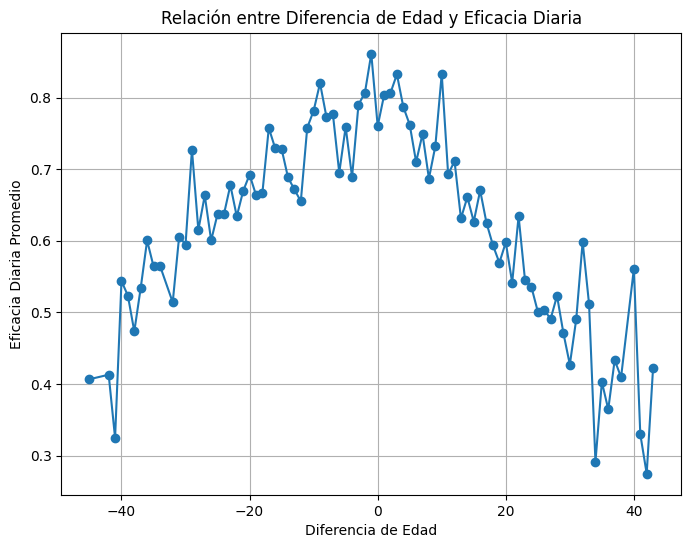

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los datos relevantes
df_filtered = df[['sup_sub_age_diff', 'actual_efficacy_h']].dropna()

# Calcular la media de eficacia diaria por cada diferencia de edad
efficacy_mean = df_filtered.groupby('sup_sub_age_diff')['actual_efficacy_h'].mean()

# Crear el gráfico lineal
plt.figure(figsize=(8, 6))
plt.plot(efficacy_mean.index, efficacy_mean.values, marker='o')
plt.title('Relación entre Diferencia de Edad y Eficacia Diaria')
plt.xlabel('Diferencia de Edad')
plt.ylabel('Eficacia Diaria Promedio')
plt.grid(True)
plt.show()



In [136]:
from scipy.stats import f_oneway

# Filtrar los datos relevantes
df_filtered = df[['sup_sub_age_diff', 'actual_efficacy_h']].dropna()

# Dividir los datos en grupos según 'sup_sub_age_diff'
age_groups = [group['actual_efficacy_h'] for name, group in df_filtered.groupby('sup_sub_age_diff')]

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(*age_groups)

print("Estadístico F:", f_statistic)
print("Valor p:", p_value)


Estadístico F: 193.00280088312275
Valor p: 0.0


In [137]:
if p_value < 0.05:
    print("Rechazar la hipótesis nula.")
else:
    print("Aceptar la hipótesis nula.")

Rechazar la hipótesis nula.


In [138]:
df_filtered = df[['sup_sub_age_diff', 'actual_efficacy_h']].dropna()

age_groups = [df_filtered[df_filtered['sup_sub_age_diff'] <= -20]['actual_efficacy_h'].mean(),
              df_filtered[(df_filtered['sup_sub_age_diff'] > -20) & (df_filtered['sup_sub_age_diff'] <= -10)]['actual_efficacy_h'].mean(),
              df_filtered[(df_filtered['sup_sub_age_diff'] > -10) & (df_filtered['sup_sub_age_diff'] <= 10)]['actual_efficacy_h'].mean(),
              df_filtered[(df_filtered['sup_sub_age_diff'] > 10) & (df_filtered['sup_sub_age_diff'] <= 20)]['actual_efficacy_h'].mean(),
              df_filtered[df_filtered['sup_sub_age_diff'] > 20]['actual_efficacy_h'].mean()]

age_groups

[0.6044331114724113,
 0.7105187985717286,
 0.769249946973232,
 0.6418524683516579,
 0.49798929314627105]

In [139]:
from scipy.stats import f_oneway

df_filtered = df[['sup_sub_age_diff', 'actual_efficacy_h']].dropna()

# Dividir los datos en grupos por edad
age_groups = [df_filtered[df_filtered['sup_sub_age_diff'] <= -20]['actual_efficacy_h'],
              df_filtered[(df_filtered['sup_sub_age_diff'] > -20) & (df_filtered['sup_sub_age_diff'] <= -10)]['actual_efficacy_h'],
              df_filtered[(df_filtered['sup_sub_age_diff'] > -10) & (df_filtered['sup_sub_age_diff'] <= 10)]['actual_efficacy_h'],
              df_filtered[(df_filtered['sup_sub_age_diff'] > 10) & (df_filtered['sup_sub_age_diff'] <= 20)]['actual_efficacy_h'],
              df_filtered[df_filtered['sup_sub_age_diff'] > 20]['actual_efficacy_h']]

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(*age_groups)

print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

Estadístico F: 3065.5868042271136
Valor p: 0.0


In [140]:
if p_value < 0.05:
    print("Rechazar la hipótesis nula.")
else:
    print("Aceptar la hipótesis nula.")

Rechazar la hipótesis nula.


In [141]:
# Realizar el análisis de Tukey
age_labels = ['-40 a -20', '-20 a -10', '-10 a 10', '10 a 20', '20 a 40']
tukey_results = pairwise_tukeyhsd(np.concatenate(age_groups), np.concatenate([[label]*len(group) for label, group in zip(age_labels, age_groups)]))

print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------
 -10 a 10 -20 a -10  -0.0587   0.0 -0.0661 -0.0514   True
 -10 a 10 -40 a -20  -0.1648   0.0 -0.1714 -0.1582   True
 -10 a 10   10 a 20  -0.1274   0.0 -0.1354 -0.1194   True
 -10 a 10   20 a 40  -0.2713   0.0 -0.2785  -0.264   True
-20 a -10 -40 a -20  -0.1061   0.0 -0.1142 -0.0979   True
-20 a -10   10 a 20  -0.0687   0.0  -0.078 -0.0594   True
-20 a -10   20 a 40  -0.2125   0.0 -0.2212 -0.2038   True
-40 a -20   10 a 20   0.0374   0.0  0.0287  0.0461   True
-40 a -20   20 a 40  -0.1064   0.0 -0.1145 -0.0984   True
  10 a 20   20 a 40  -0.1439   0.0 -0.1531 -0.1346   True
---------------------------------------------------------


In [142]:
# Identificar las comparaciones significativamente diferentes
comparaciones_significativas = tukey_results.reject
comparaciones_grupo = tukey_results.groupsunique

for i in range(len(comparaciones_grupo)):
    for j in range(i + 1, len(comparaciones_grupo)):
        group1 = comparaciones_grupo[i]
        group2 = comparaciones_grupo[j]
        es_significativa = comparaciones_significativas[i]
        
        if es_significativa:
            print(f"'{group1}' VS '{group2}'.")

'-10 a 10' VS '-20 a -10'.
'-10 a 10' VS '-40 a -20'.
'-10 a 10' VS '10 a 20'.
'-10 a 10' VS '20 a 40'.
'-20 a -10' VS '-40 a -20'.
'-20 a -10' VS '10 a 20'.
'-20 a -10' VS '20 a 40'.
'-40 a -20' VS '10 a 20'.
'-40 a -20' VS '20 a 40'.
'10 a 20' VS '20 a 40'.


Los trabajadores que colaboran principalmente con compañeros del mismo sexo muestran una eficacia diaria promedio diferente en comparación con aquellos que trabajan con compañeros del sexo opuesto.

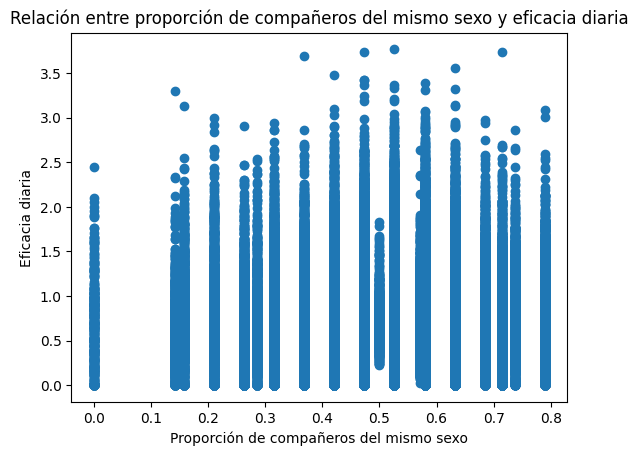

In [143]:
import matplotlib.pyplot as plt

# Filtrar los datos relevantes y eliminar filas con valores nulos
df_filtered = df[['sub_colls_same_sex_prtn', 'actual_efficacy_h']].dropna()

# Crear el gráfico de dispersión
plt.scatter(df_filtered['sub_colls_same_sex_prtn'], df_filtered['actual_efficacy_h'])
plt.xlabel('Proporción de compañeros del mismo sexo')
plt.ylabel('Eficacia diaria')
plt.title('Relación entre proporción de compañeros del mismo sexo y eficacia diaria')
plt.show()


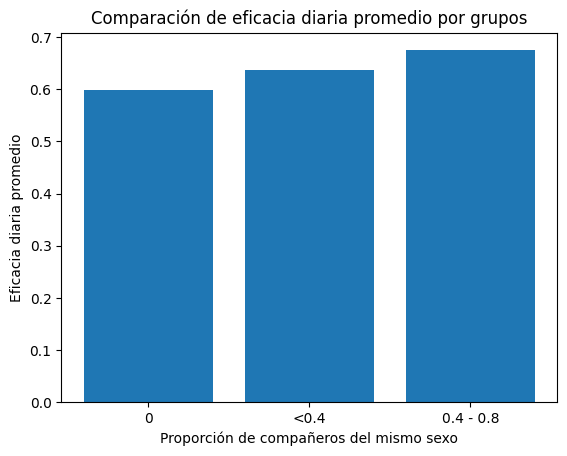

In [144]:
import matplotlib.pyplot as plt

# Filtrar los datos relevantes y eliminar filas con valores nulos
df_filtered = df[['sub_colls_same_sex_prtn', 'actual_efficacy_h']].dropna()

# Crear grupos según la proporción de compañeros del mismo sexo
group_0 = df_filtered[df_filtered['sub_colls_same_sex_prtn'] == 0]
group_1 = df_filtered[df_filtered['sub_colls_same_sex_prtn'] <= 0.4]
group_2 = df_filtered[(df_filtered['sub_colls_same_sex_prtn'] < 0.8) & (df_filtered['sub_colls_same_sex_prtn'] > 0.4)]
group_3 = df_filtered[df_filtered['sub_colls_same_sex_prtn'] == 0.8]

# Calcular la eficacia diaria promedio por grupo
mean_efficiency_group_0 = group_0['actual_efficacy_h'].mean()
mean_efficiency_group_1 = group_1['actual_efficacy_h'].mean()
mean_efficiency_group_2 = group_2['actual_efficacy_h'].mean()
mean_efficiency_group_3 = group_3['actual_efficacy_h'].mean()

# Crear el gráfico de barras
groups = ['0', '<0.4','0.4 - 0.8','0.8']
mean_efficiency = [mean_efficiency_group_0, mean_efficiency_group_1, mean_efficiency_group_2, mean_efficiency_group_3]

plt.bar(groups, mean_efficiency)
plt.xlabel('Proporción de compañeros del mismo sexo')
plt.ylabel('Eficacia diaria promedio')
plt.title('Comparación de eficacia diaria promedio por grupos')
plt.show()


In [154]:
# Filtrar los datos relevantes y eliminar filas con valores nulos
df_filtered = df[['sub_colls_same_sex_prtn', 'actual_efficacy_h']].dropna()

# Crear grupos según la proporción de compañeros del mismo sexo
group_labels = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8']
group_ranges = [(i/10, (i+1)/10) for i in range(8)]

mean_efficiency_by_group = []

for group_range in group_ranges:
    group = df_filtered[(df_filtered['sub_colls_same_sex_prtn'] >= group_range[0]) & 
                        (df_filtered['sub_colls_same_sex_prtn'] < group_range[1])]
    mean_efficiency_by_group.append(group['actual_efficacy_h'].mean())

In [155]:
mean_efficiency_by_group

[0.5976692708333333,
 0.6241031128404669,
 0.6637788534548216,
 0.6332455137445941,
 0.645742330187127,
 0.680924533964718,
 0.73190109076551,
 0.7014194116495988]

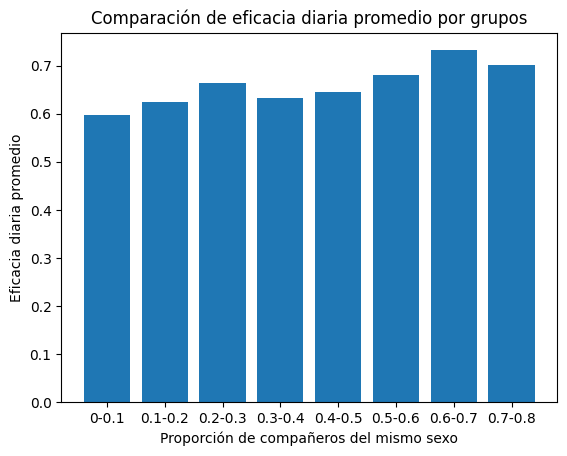

In [149]:
import matplotlib.pyplot as plt

# Filtrar los datos relevantes y eliminar filas con valores nulos
df_filtered = df[['sub_colls_same_sex_prtn', 'actual_efficacy_h']].dropna()

# Crear grupos según la proporción de compañeros del mismo sexo
group_labels = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8']
group_ranges = [(i/10, (i+1)/10) for i in range(8)]

mean_efficiency_by_group = []

for group_range in group_ranges:
    group = df_filtered[(df_filtered['sub_colls_same_sex_prtn'] >= group_range[0]) & 
                        (df_filtered['sub_colls_same_sex_prtn'] < group_range[1])]
    mean_efficiency_by_group.append(group['actual_efficacy_h'].mean())

# Crear el gráfico de barras
plt.bar(group_labels, mean_efficiency_by_group)
plt.xlabel('Proporción de compañeros del mismo sexo')
plt.ylabel('Eficacia diaria promedio')
plt.title('Comparación de eficacia diaria promedio por grupos')
plt.show()


In [150]:
# Filtrar los datos relevantes y eliminar filas con valores nulos
df_filtered = df[['sub_colls_same_sex_prtn', 'actual_efficacy_h']].dropna()

# Crear grupos según la proporción de compañeros del mismo sexo
group_ranges = [(i/10, (i+1)/10) for i in range(8)]

groups = [df_filtered[(df_filtered['sub_colls_same_sex_prtn'] >= group_range[0]) & 
                      (df_filtered['sub_colls_same_sex_prtn'] < group_range[1])]['actual_efficacy_h']
          for group_range in group_ranges]

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(*groups)

# Mostrar los resultados
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)


Estadístico F: 159.8948938407874
Valor p: 1.0163436189154907e-236


In [151]:
if p_value < 0.05:
    print("Rechazar la hipótesis nula.")
else:
    print("Aceptar la hipótesis nula.")

Rechazar la hipótesis nula.


In [157]:
# Realizar el análisis de Tukey
datos = np.concatenate(groups)
group_labels = [f'Group {i}' for i in range(len(groups)) for _ in range(len(groups[i]))]

tukey_results = pairwise_tukeyhsd(datos, group_labels)

print(tukey_results)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Group 0 Group 1   0.0264 0.9215 -0.0384  0.0913  False
Group 0 Group 2   0.0661 0.0336  0.0028  0.1295   True
Group 0 Group 3   0.0356 0.6565 -0.0262  0.0973  False
Group 0 Group 4   0.0481 0.2533 -0.0133  0.1094  False
Group 0 Group 5   0.0833  0.001  0.0219  0.1446   True
Group 0 Group 6   0.1342    0.0  0.0725   0.196   True
Group 0 Group 7   0.1038    0.0  0.0418  0.1657   True
Group 1 Group 2   0.0397 0.0003  0.0125  0.0668   True
Group 1 Group 3   0.0091 0.9335  -0.014  0.0323  False
Group 1 Group 4   0.0216 0.0594 -0.0004  0.0437  False
Group 1 Group 5   0.0568    0.0  0.0347  0.0789   True
Group 1 Group 6   0.1078    0.0  0.0846   0.131   True
Group 1 Group 7   0.0773    0.0  0.0537   0.101   True
Group 2 Group 3  -0.0305    0.0 -0.0491  -0.012   True
Group 2 Group 4   -0.018 0.0311 -0.0352 -0.0009   True
Group 2 Gr

In [158]:
# Identificar las comparaciones significativamente diferentes
comparaciones_significativas = tukey_results.reject
comparaciones_grupo = tukey_results.groupsunique

for i in range(len(comparaciones_grupo)):
    for j in range(i + 1, len(comparaciones_grupo)):
        group1 = comparaciones_grupo[i]
        group2 = comparaciones_grupo[j]
        es_significativa = comparaciones_significativas[i]
        
        if es_significativa:
            print(f"'{group1}' VS '{group2}'.")

'Group 1' VS 'Group 2'.
'Group 1' VS 'Group 3'.
'Group 1' VS 'Group 4'.
'Group 1' VS 'Group 5'.
'Group 1' VS 'Group 6'.
'Group 1' VS 'Group 7'.
'Group 4' VS 'Group 5'.
'Group 4' VS 'Group 6'.
'Group 4' VS 'Group 7'.
'Group 5' VS 'Group 6'.
'Group 5' VS 'Group 7'.
'Group 6' VS 'Group 7'.
